# Анализ спроса 

Российская авиакомпания F9, которая выполняет внутренние пассажирские перевозки заказала исследование предпочтений пользователей, покупающих билеты на разные направления и анализ спроса пассажиров на рейсы в города, где проходят крупнейшие фестивали.

Для выполнения исследования необходимо выполнить сбор данных о крупнейших фестивалях, исследовать предоставленные базы данных, а именно:

Таблица airports — информация об аэропортах

Таблица aircrafts — информация о самолётах

Таблица tickets — информация о билетах

Таблица flights — информация о рейсах

Таблица ticket_flights — стыковая таблица «рейсы-билеты»

Таблица festivals — информация о фестивалях


Затем получить сводные таблицы и:

•	импортировать файлы;

•	изучить данные в них;

•	проверить типы данных на корректность;

•	выбрать топ-10 городов по количеству рейсов;

•	построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

•	сделать выводы по каждому из графиков, пояснить результат.

# Изучение полученных данных

Согласно исходных данных, путь к файлам - /datasets/query_1.csv и /datasets/query_3.csv . Откроем и рассмотрим предоставленные данные


In [1]:
# импортируем необходимые нам библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats as st


In [ ]:
#Подключим файлы с данными 
airplane = pd.read_csv('/datasets/query_1.csv')
airport = pd.read_csv('/datasets/query_3.csv')

In [2]:
print('Таблица данными о самолетах и количестве рейсов каждой модели')
#Просмотрим общую информацию о данных
display(airplane.info())

#Просмотрим данные функцией describle
display(airplane.describe())

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

airplane.sample(5, random_state=1)

Таблица данными о самолетах и количестве рейсов каждой модели
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


,model,flights_amount
7,Sukhoi SuperJet-100,4185
2,Boeing 737-300,630
1,Airbus A321-200,960
6,Cessna 208 Caravan,4557
0,Airbus A319-100,607


In [3]:
print('Таблица данными о городах и количестве рейсов в каждый город')
#Просмотрим общую информацию о данных
display(airport.info())

#Просмотрим данные функцией describle
display(airport.describe())

# Применим случайную выборку данных для первичного ознакомления
# Укажем параметр random_state=1, для сохранения результата при повторных запусках алгоритма, если нам
# вдруг понадобится

airport.sample(5, random_state=1)

Таблица данными о городах и количестве рейсов в каждый город
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


,city,average_flights
94,Челябинск,6.709677
78,Сыктывкар,4.129032
17,Геленджик,2.590909
100,Ярославль,1.322581
36,Кызыл,1.277778


Согласно описанию столбцов данных предоставленым заказчиком:

Столбцы датасета airplane содержат информацию о:
model — о модели самолета,
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

Столбцы датасета airport содержат следующую информацию:
city — о городах,
average_flights — о среднем количестве рейсов, прибывающих в город city за день в августе 2018 года.

In [4]:
# проверим на дубликаты
print('Количество явных дубликатов: ', airplane.duplicated().sum())
print('Количество явных дубликатов: ', airport.duplicated().sum())

Количество явных дубликатов:  0
Количество явных дубликатов:  0


## Выводы

Данные в отличном состоянии, не содержат пропусков и готовы к анализу и построению графиков

<div class="alert alert-success">
    <p><b>Комментарий ревьюера: </b></p>
    
Да, в этот раз повезло. Ни пропусков, ни дубликатов.
</div>

# Исследование данных

В настоящем разделе мы осуществим следующие операции:

Отберем топ-10 городов по количеству рейсов;

Построим графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;

Сделаем выводы по каждому из графиков.

1. Получим топ-10 городов по количеству рейсов:

In [5]:
top_10_cities = airport.sort_values(by='average_flights', ascending=False).head(10)
top_10_cities

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


2. Построим график количества рейсов в сентябре 2018 года с разбивкой по топ-10 городов прилета

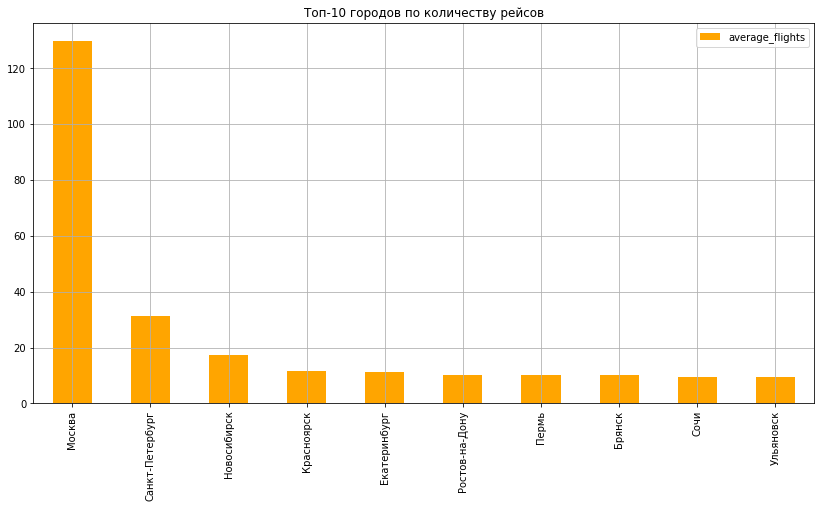

In [6]:
top_10_cities.plot(color='orange', kind='bar')
plt.title('Топ-10 городов по количеству рейсов', fontsize=12)
plt.grid()

plt.xticks(range(10), top_10_cities['city'].tolist(), rotation='vertical')

fig = plt.gcf()
fig.set_size_inches(14, 7)

plt.show()

Очевидно, огромное количество рейсов прибывающих за день в Москву. Это количество сравнимо с общим количеством прилетов всех остальных городов входящих в Топ-10. Находящийся на втором месте Санкт-Петербург по прилетам отстает от Москвы в четыре раза, Находящийся на третьем месте Новосибирск примерно в два раза уступает Санкт-Петербургу. Остальные города из топ-10 примерно равны и примерно в два раза по количеству дневных прилётов меньше Новосибирска. 

3. Построим график количества рейсов в сентябре 2018 года с разбивкой по моделям самолетов

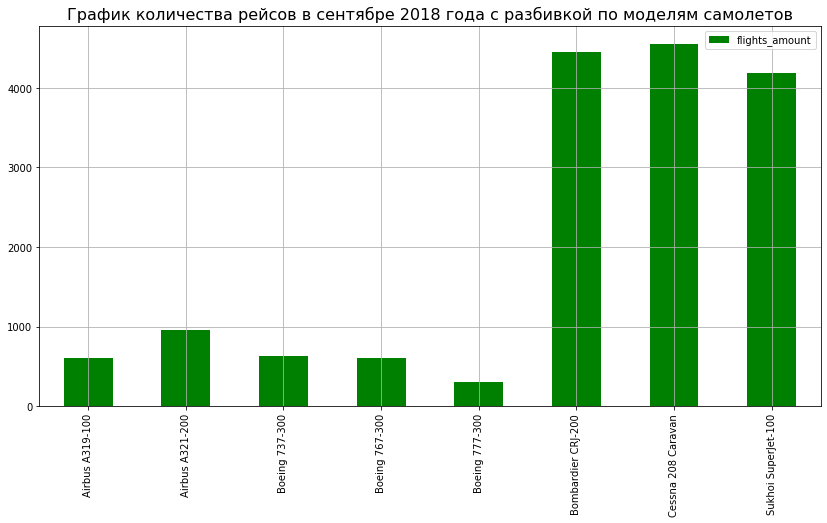

In [7]:
airplane.plot(color='green', kind='bar')
plt.title('График количества рейсов в сентябре 2018 года с разбивкой по моделям самолетов', fontsize=16)
plt.grid()

plt.xticks(range(8), airplane['model'].tolist(), rotation='vertical')

fig = plt.gcf()
fig.set_size_inches(14, 7)

plt.show()

Очевидно, что большая часть рейсов приходится на самолеты небольшой вместимости (Сessna 208A Caravan вмещает 9 пассажиров, Bombardier CRJ200 вмещает 50 пассажиров) и на современную модель российского производства Sukhoi Superjet 100 которая продвигается на российском рынке. 

4. Построим график количества рейсов в сентябре 2018 года с разбивкой по городам прилета

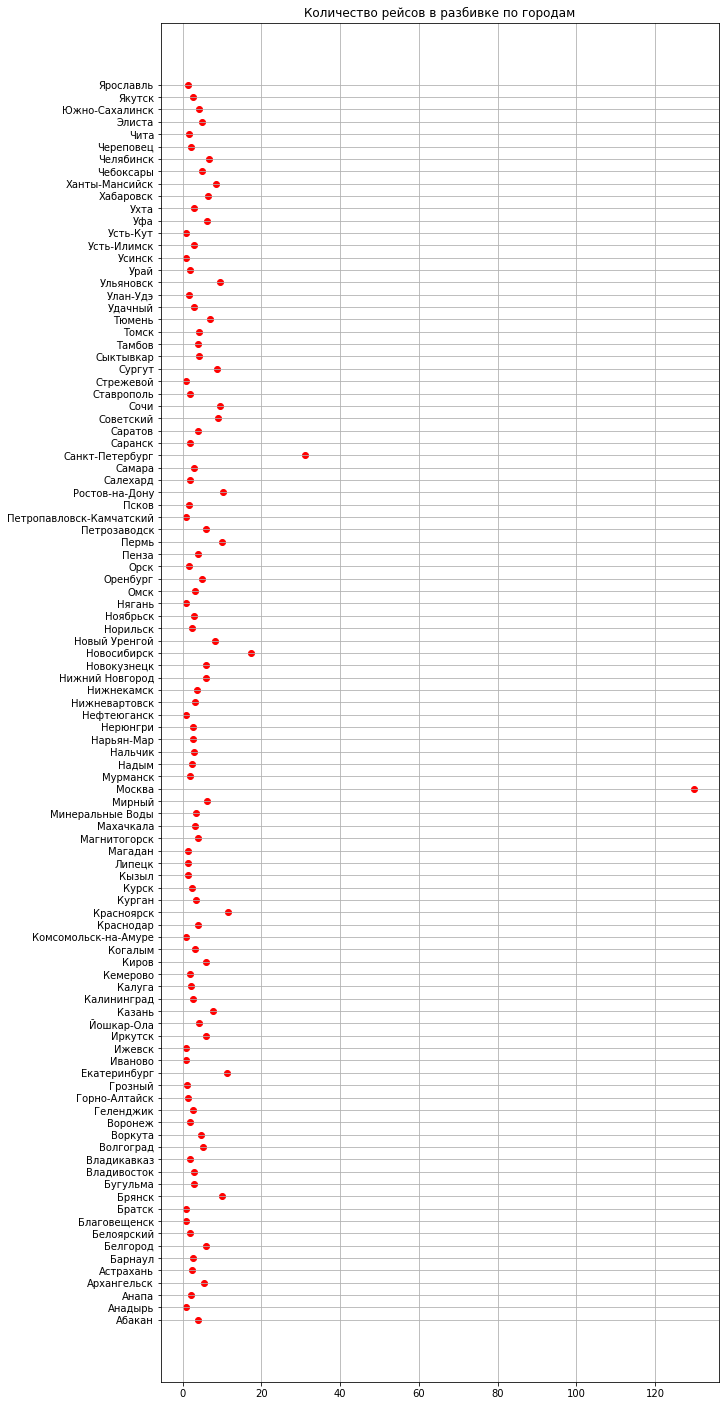

In [8]:

plt.scatter(x=airport['average_flights'], y=airport['city'], c='red')
plt.title('Количество рейсов в разбивке по городам', fontsize=12)


fig = plt.gcf()
fig.set_size_inches(10, 25)
plt.grid()

plt.show()

График только подтверждает ранее полученные данные по четвому лидерству трех городов Москвы, Санкт-Петербурга и Новосибирска. При этом Москва примерно равна по количеству рейсов прилета суммарно всем остальным городам из топ-10 прилетов

# Выводы

    Для авиакомпании занимающейся внутренними пассажирскими перевозками совершенно точно можно порекомендовать состредоточиться на рейсах в Москву, Санкт-Петербург и Новосибирск. Эти три города смогут загрузить рейсы региональной компании полностью. Возможно стоит подумать о создании своих узлов и пересадок в этих городах.

    Второй вывод заключается в рекомендации использования отечественных Sukhoi Superjet 100 на которых могут быть интересные программы приобретения. Больное место этой модели - плохой сервис и отсутсвие складов запчастей будет нивелироваться, если сосредоточиться на трех основных хабах РФ.

    Третий вывод - возможно имеет смысл уходить в бизнес чертеры - очевидно, что Москва это большой рынок малых чартерных перевозок. При вложении в аналоги Сessna 208A Caravan можно предложить рынку аналог такси, только воздушного. Это может быть очень востребовано среди добывающих компаний, так как подобные самолеты не требуют особой подготовки летного поля.
    